In [507]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [508]:
data_train = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [509]:
data_train.shape

(891, 12)

In [510]:
data_test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
data_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [511]:
data_test.shape

(418, 11)

In [512]:
data_train.replace(["female", "male"],[0,1], inplace = True)
data_train.replace(["C","Q","S"],[0,1,2],inplace=True)

data_test.replace(["female" ,"male"] , [0,1] , inplace=True)
data_test.replace(["C","Q","S"],[0,1,2],inplace=True)

In [513]:
data_train.drop(['Cabin','PassengerId','Name','Ticket','Fare'] ,axis=1 , inplace=True)
data_test.drop(['Cabin','PassengerId','Name','Ticket','Fare'] ,axis=1 , inplace=True)

In [514]:
data_train.isnull().value_counts()

Survived  Pclass  Sex    Age    SibSp  Parch  Embarked
False     False   False  False  False  False  False       712
                         True   False  False  False       177
                         False  False  False  True          2
dtype: int64

In [515]:
avg_age1 = data_train.loc[: ,'Age'].mean()
age_NaN1 = avg_age1.round()
age_NaN1

30.0

In [516]:
data_train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Embarked    float64
dtype: object

In [517]:
data_train.fillna(30.0 , inplace=True)
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,2.0
1,1,1,0,38.0,1,0,0.0
2,1,3,0,26.0,0,0,2.0
3,1,1,0,35.0,1,0,2.0
4,0,3,1,35.0,0,0,2.0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,2.0
887,1,1,0,19.0,0,0,2.0
888,0,3,0,30.0,1,2,2.0
889,1,1,1,26.0,0,0,0.0


In [518]:
avg_age2 = data_test.loc[: ,'Age'].mean()
age_NaN2 = avg_age2.round()
age_NaN2

30.0

In [519]:
data_test.fillna(30.0 , inplace=True)
data_test

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,1
1,3,0,47.0,1,0,2
2,2,1,62.0,0,0,1
3,3,1,27.0,0,0,2
4,3,0,22.0,1,1,2
...,...,...,...,...,...,...
413,3,1,30.0,0,0,2
414,1,0,39.0,0,0,0
415,3,1,38.5,0,0,2
416,3,1,30.0,0,0,2


In [520]:
data_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

<Axes: >

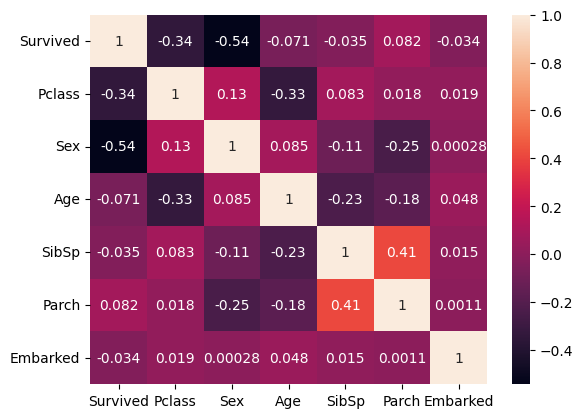

In [521]:
corr_train = data_train.corr()
sns.heatmap(corr_train , annot=True )

In [522]:
X = np.array(data_train[["Pclass","Sex","Age","SibSp","Parch"]])
Y = np.array(data_train[["Survived"]])

In [523]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.2)

## Model

In [524]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5 , activation="sigmoid") , # input layer
    tf.keras.layers.Dense(20 , activation="softplus") , # hidden layer 1
    tf.keras.layers.Dense(8 , activation="sigmoid") ,  # hidden layer 2
    tf.keras.layers.Dense(2 , activation="softmax") # output layer
])

In [525]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [526]:
output_trian = model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
23/23 [==============================] - 1s 2ms/step - loss: 0.6765 - accuracy: 0.6081
Epoch 2/300
23/23 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6152
Epoch 3/300
23/23 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.6236
Epoch 4/300
23/23 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.7022
Epoch 5/300
23/23 [==============================] - 0s 3ms/step - loss: 0.5396 - accuracy: 0.7416
Epoch 6/300
23/23 [==============================] - 0s 3ms/step - loss: 0.5308 - accuracy: 0.7500
Epoch 7/300
23/23 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.7444
Epoch 8/300
23/23 [==============================] - 0s 2ms/step - loss: 0.4784 - accuracy: 0.8160
Epoch 9/300
23/23 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.8076
Epoch 10/300
23/23 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.8104
Epoch 11/

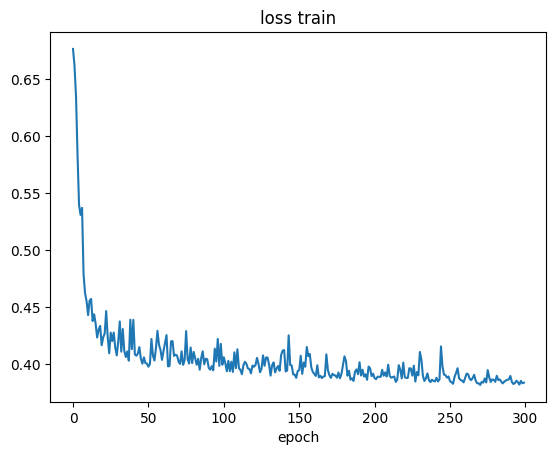

In [527]:
plt.plot(output_trian.history["loss"])
plt.title("loss train")
plt.xlabel("epoch")
plt.show()


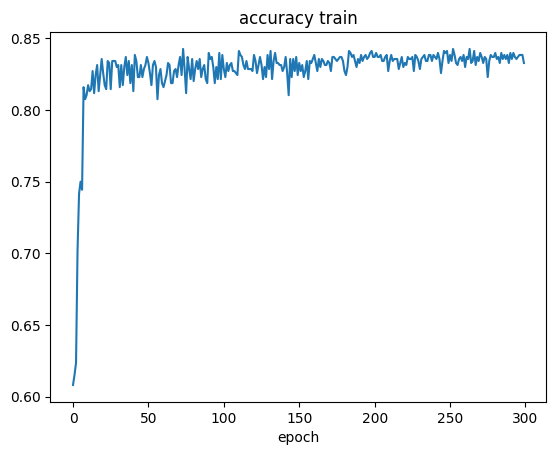

In [537]:
plt.plot(output_trian.history["accuracy"])
plt.title("accuracy train")
plt.xlabel("epoch")
plt.show()

In [533]:
output_test = model.fit(X_test,Y_test,epochs=480)

Epoch 1/480
6/6 [==============================] - 0s 15ms/step - loss: 0.3063 - accuracy: 0.8380
Epoch 2/480
6/6 [==============================] - 0s 14ms/step - loss: 0.2941 - accuracy: 0.8436
Epoch 3/480
6/6 [==============================] - 0s 17ms/step - loss: 0.3165 - accuracy: 0.8324
Epoch 4/480
6/6 [==============================] - 0s 16ms/step - loss: 0.2981 - accuracy: 0.8436
Epoch 5/480
6/6 [==============================] - 0s 16ms/step - loss: 0.2991 - accuracy: 0.8380
Epoch 6/480
6/6 [==============================] - 0s 9ms/step - loss: 0.2978 - accuracy: 0.8380
Epoch 7/480
6/6 [==============================] - 0s 11ms/step - loss: 0.2959 - accuracy: 0.8101
Epoch 8/480
6/6 [==============================] - 0s 5ms/step - loss: 0.3011 - accuracy: 0.8212
Epoch 9/480
6/6 [==============================] - 0s 7ms/step - loss: 0.3019 - accuracy: 0.8380
Epoch 10/480
6/6 [==============================] - 0s 6ms/step - loss: 0.2918 - accuracy: 0.8380
Epoch 11/480
6/6 [=====

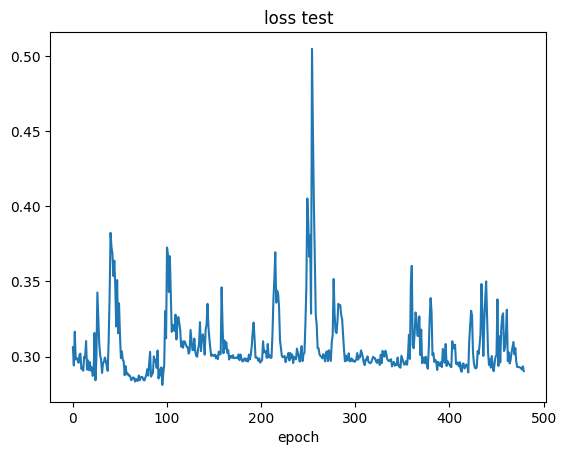

In [534]:
plt.plot(output_test.history["loss"])
plt.title("loss test")
plt.xlabel("epoch")
plt.show()

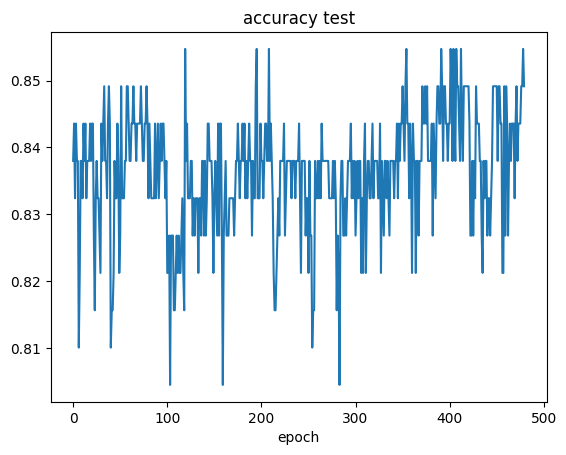

In [536]:
plt.plot(output_test.history['accuracy'])
plt.title('accuracy test')
plt.xlabel('epoch')
plt.show()